# <center> TP2 / Schéma explicite pour l'équation de la chaleur
 
 </center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 SI GR02 </center>
    <center> 26/10/2020 </center>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import time

## 1. Initialisations

### 1.1. Initialisation des paramètres numériques

In [2]:
Nz = 400
dz = 0.25
Nt = 5000
dt = (365*24*60*60)/Nt

### 1.2. Initialisation des paramètres physiques

In [3]:
K = 2*10**(-6)
r = (K * dt) / (dz**2)

### 1.3. Initialisation du maillage et de la donnée initiale

In [4]:
temps = np.arange(0, 12, 12/Nt)
u = 15*np.ones((Nz, Nt))

## 2. Calcul des $U_i^n$

### 2.1. Condition à la surface

In [5]:
u[0, :] = 15 - 10 * np.sin(2*np.pi*temps/12)
print("u = \n",u)

u = 
 [[15.         14.98743363 14.97486729 ... 15.03769902 15.02513271
  15.01256637]
 [15.         15.         15.         ... 15.         15.
  15.        ]
 [15.         15.         15.         ... 15.         15.
  15.        ]
 ...
 [15.         15.         15.         ... 15.         15.
  15.        ]
 [15.         15.         15.         ... 15.         15.
  15.        ]
 [15.         15.         15.         ... 15.         15.
  15.        ]]


#### Début de mesure du temps

In [6]:
tic = time.time()

### 2.2. Boucle en temps

In [7]:
err = []
e = 10**-4
maxiter = 500

for itera in range(0,maxiter):
    uold = u.copy()
    u[:,0] = uold[:, Nt-1].copy()
    
    for n in range(1, Nt):
        profondeur = u[0:Nz-3,n-1] - 2*u[1:Nz-2,n-1] + u[2:Nz-1,n-1]
        u[1:Nz-2,n] = r * profondeur + u[1:Nz-2, n-1] 
        u[Nz-1, n] = u[Nz-2, n].copy()
        
    errmax = np.amax(np.absolute(u-uold))
    err.append(errmax)
    if err[itera] < e:
        print("iterations : ",itera)
        break

print("u = \n",u)

iterations :  60
u = 
 [[15.01256637 14.98743363 14.97486729 ... 15.03769902 15.02513271
  15.01256637]
 [15.53928897 15.52742342 15.51302076 ... 15.5630182  15.55115437
  15.53928967]
 [16.00722185 15.99605299 15.98488256 ... 16.0295562  16.01839054
  16.00722326]
 ...
 [14.99998843 14.99998843 14.99998843 ... 14.99998913 14.99998913
  14.99998913]
 [15.         15.         15.         ... 15.         15.
  15.        ]
 [15.         15.         15.         ... 15.         15.
  15.        ]]


## 3. Visualisation graphique des résultats

### 3.1. Figure 1: Iso-valeurs de la température

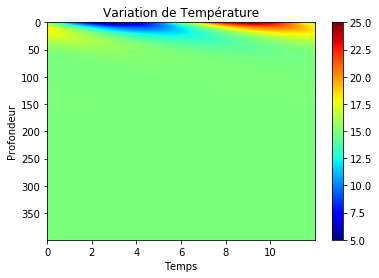

In [8]:
X, Y = np.meshgrid(temps, range(Nz))
plt.gca().invert_yaxis()
plt.pcolor(X, Y, u, cmap=plt.cm.jet)
plt.xlabel("Temps")
plt.ylabel("Profondeur")
plt.title('Variation de Température')
plt.colorbar()
plt.show()

### 3.2. Figure 2: Erreur de convergence

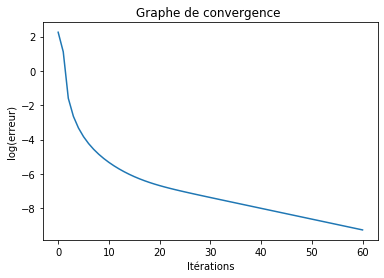

In [9]:
plt.plot( np.log(err) )
plt.xlabel("Itérations")
plt.ylabel("log(erreur)")
plt.title('Graphe de convergence ')
plt.show()

### 3.3. Figure 3: Variations 1D de la température

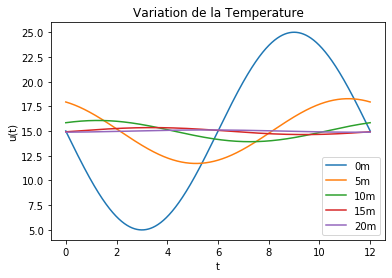

In [10]:
plt.plot(temps, u[0,:], label='0m')
plt.plot(temps, u[20,:], label='5m')
plt.plot(temps, u[40,:], label='10m')
plt.plot(temps, u[60,:], label='15m')
plt.plot(temps, u[80,:], label='20m')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.title('Variation de la Temperature')
plt.show()

#### Fin de mesure du temps

In [11]:
toc = time.time()

print("********** Temps d'execution = %s secondes **********" % (toc - tic) )

********** Temps d'execution = 39.96410584449768 secondes **********
